<a href="https://colab.research.google.com/github/helenkristanti/Random_Forest_Skripsi/blob/main/APP_02_SKRIPSI_HELEN_LABELLING_VADERSENTIMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***READING THE DATASET OF TRANSLATION RESULTS***

In [ ]:
import pandas as pd
import numpy as np

def load_data():
    data = pd.read_csv('Hasil-Translate-Data.csv')
    return data

tweet_df = load_data()
tweet_df.head(4)

,created_at,reply_count,retweet_count,favorite_count,tweet
0,Fri May 12 03:44:28 +0000 2023,0,3,0,official bts ptd seoul mini photocards jinrmam...
1,Sat May 13 15:11:54 +0000 2023,3,82,668,youth nn bts universe dizisi youth oyuncuları ...
2,Sat May 13 11:55:58 +0000 2023,1,0,0,yes bts hangul bangtan sonyeondan bangtan boys...
3,Wed May 03 02:49:17 +0000 2023,0,1,1,yoongi sowoozoo mini pc set with pajama pcnn n...


# ***INSTALL LIBRARIES VADERSENTIMENT***

In [ ]:
!pip install VaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


# ***COUNT ANALYSER POLARITY SCORE***

In [ ]:
scores = [analyser.polarity_scores(x) for x in tweet_df['tweet']]
tweet_df['Compound_Score'] = [x['compound'] for x in scores]

tweet_df.head(5)

#nilai compund score didapatkan dari kamus data setiap pelabelan

,created_at,reply_count,retweet_count,favorite_count,tweet,Compound_Score
0,Fri May 12 03:44:28 +0000 2023,0,3,0,official bts ptd seoul mini photocards jinrmam...,0.0000
1,Sat May 13 15:11:54 +0000 2023,3,82,668,youth nn bts universe dizisi youth oyuncuları ...,0.9509
2,Sat May 13 11:55:58 +0000 2023,1,0,0,yes bts hangul bangtan sonyeondan bangtan boys...,0.4019
3,Wed May 03 02:49:17 +0000 2023,0,1,1,yoongi sowoozoo mini pc set with pajama pcnn n...,0.0000
4,Fri Apr 28 14:12:50 +0000 2023,0,1,0,bts album photocards nn fb scoph nls bangtan b...,0.0000



# ***MEMBAGI DATASET MENJADI KELAS POSITIF, NEGATIF, DAN NETRAL***

In [ ]:
tweet_df.loc[tweet_df['Compound_Score'] < 0, 'Sentiments'] = 'Negatif'
tweet_df.loc[tweet_df['Compound_Score'] == 0, 'Sentiments'] = 'Netral'
tweet_df.loc[tweet_df['Compound_Score'] > 0, 'Sentiments'] = 'Positif'
tweet_df.head(10)

,created_at,reply_count,retweet_count,favorite_count,tweet,Compound_Score,Sentiments
0,Fri May 12 03:44:28 +0000 2023,0,3,0,official bts ptd seoul mini photocards jinrmam...,0.0000,Netral
1,Sat May 13 15:11:54 +0000 2023,3,82,668,youth nn bts universe dizisi youth oyuncuları ...,0.9509,Positif
2,Sat May 13 11:55:58 +0000 2023,1,0,0,yes bts hangul bangtan sonyeondan bangtan boys...,0.4019,Positif
3,Wed May 03 02:49:17 +0000 2023,0,1,1,yoongi sowoozoo mini pc set with pajama pcnn n...,0.0000,Netral
4,Fri Apr 28 14:12:50 +0000 2023,0,1,0,bts album photocards nn fb scoph nls bangtan b...,0.0000,Netral
5,Fri Apr 28 18:24:18 +0000 2023,0,1,1,btsbangtan sticky notes setnn n lfb sco ph ls ...,0.0000,Netral
6,Wed Apr 26 15:35:52 +0000 2023,2,0,0,jimincilok jiminangis taertaglia northwardst k...,0.0000,Netral
7,Thu Apr 27 17:42:31 +0000 2023,0,1,0,bts x tiny tan pillows mugmania bts x tiny tan...,0.0000,Netral
8,Fri Mar 31 13:46:01 +0000 2023,0,0,0,check bangtan boys bts ring men women stainles...,0.0000,Netral
9,Mon Apr 03 14:00:41 +0000 2023,612,399,797,top kpop membersnn jin n junho n v n jungkook ...,0.2023,Positif


# ***SAVE LABELING RESULTS DATA***

In [ ]:
tweet_df.to_csv('Hasil-Labelling-Data-VaderSentiment.csv',encoding='utf8', index=False)

# ***JUMLAH ANALISIS SENTIMEN BTS***

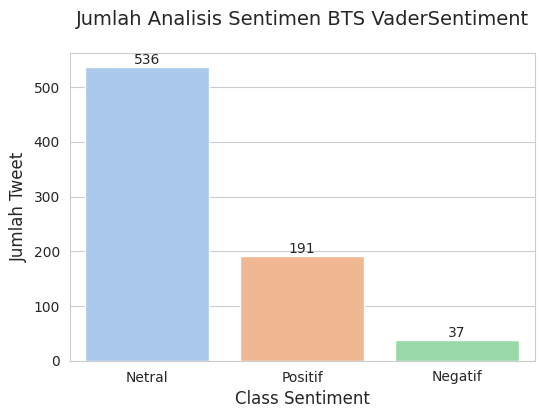

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df = pd.read_csv('Hasil-Labelling-Data-VaderSentiment.csv')

# menghitung jumlah setiap sentimen
sentiment_count = df['Sentiments'].value_counts()

# mengatur gaya plot
sns.set_style('whitegrid')

# membuat petak batang
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen BTS VaderSentiment', fontsize=14, pad=20)
plt.xlabel('Class Sentiment',fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

# tambahkan label di atas setiap batang
for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

# ***PRESENTASE ANALISIS SENTIMEN BTS***

764


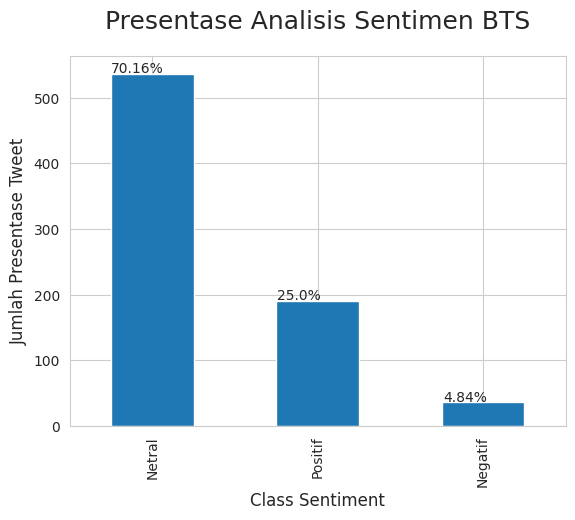

In [ ]:
plt.title('Presentase Analisis Sentimen BTS', fontsize=18, pad=20)
plt.xlabel('Class Sentiment',fontsize=12)
plt.ylabel('Jumlah Presentase Tweet', fontsize=12)

s = pd.value_counts(df['Sentiments'])
ax = s.plot.bar()
n = len(df.index)
print(n)
for p in ax.patches:
  ax.annotate(str(round(p.get_height() / n*100, 2)) + '%', (p.get_x() * 1.005, p.get_height() *1.005))

# ***PIE CHART PRESENTASE ANALISIS SENTIMEN BTS***

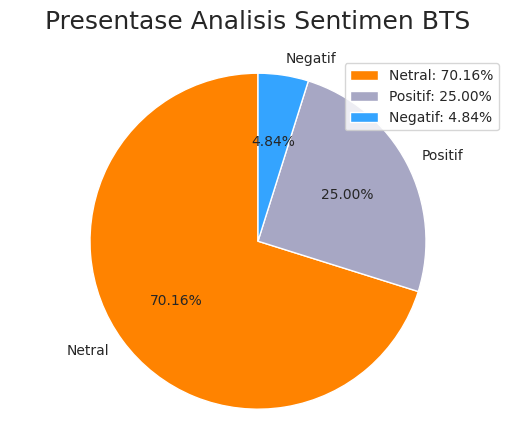

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv('Hasil-Labelling-Data-VaderSentiment.csv')

# Menghitung jumlah label
labels = data['Sentiments'].value_counts()

# Data untuk pie chart
labels_pie = labels.index.tolist()
values_pie = labels.tolist()
colors = ['#FF8300', '#A7A7C4', '#34A4FF']  # Ganti warna sesuai kebutuhan

# Membuat pie chart
plt.title('Presentase Analisis Sentimen BTS', fontsize=18, pad=20)
plt.pie(values_pie, labels=labels_pie, colors=colors, autopct='%.2f%%', startangle=90)

# Menambahkan persentase dan teks di luar pie chart
total = sum(values_pie)
percentages = [(value / total) * 100 for value in values_pie]
labels_with_percentage = [f"{label}: {percentage:.2f}%" for label, percentage in zip(labels_pie, percentages)]
plt.legend(labels_with_percentage, loc='best')

# Menampilkan pie chart
plt.axis('equal')
plt.show()


# ***WORDCLOUD SENTIMEN BTS***

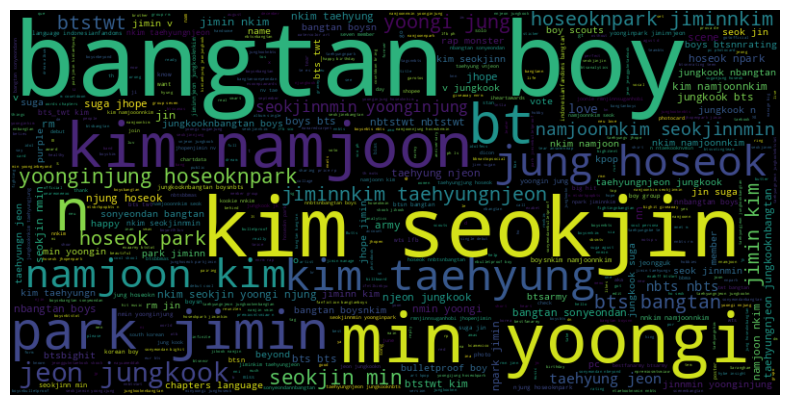

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(df['tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="black", max_words=1000, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()